## CIND830 - Python Programming for Data Science  
### Assignment 2 (10% of the final grade) 
### Due on July 25, 2022 11:59 PM 

*****
This is a Jupyter Notebook document that extends a simple formatting syntax for authoring HTML and PDF. Review [this](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) website for more details on using Jupyter Notebooks.

Consider using a Jupyter Notebook platform to complete this assignment. Ensure using **Python 3.7 release or higher** then complete the assignment by inserting your Python code wherever seeing the string `#INSERT YOUR ANSWER HERE.`

When you click the `File` button, from the top navigation bar, then select `Export Notebook to HTML`, an HTML document will be generated that includes both the assignment content and the output of any embedded Python code chunks.

Use [these](https://www.ryerson.ca/courses/students/tutorials/assignments/) guidelines to submit **both** the IPYNB and the exported file (HTML). Failing to submit both files will be subject to mark deduction.

Please be advised that you cannot get more than 100% in this assignment, and the **BONUS** question (if there is any) will only be graded if all other questions have been submitted.

*****


### **Question 1  [60 pts]**:

The sample data file used in this question is downloaded from (https://www.opensourceshakespeare.org) and converted to a CSV file named `rjParagraphs.csv` which can be either found on the course shell under the `Assignment 2` tab or downloaded by clicking on [this link](https://app.box.com/s/7qy51of3ekiiwvef2g63xwhf2neg73dy).  The `rjParagraphs.csv` is a delimited text file containing the paragraph dialogues for some of the main characters in Romeo and Juliet, Shakespeare's play. The file contains the following columns separated by the comma character `,`
* CharName: The name of the character in the play.
* PlainText: The dialogue said by the respective character.

Note: Only Python [built-in functions](https://docs.python.org/3.7/library/functions.html) or [standard modules](https://docs.python.org/3.7/py-modindex.html) are allowed to be used in this question. Do not use a third-party library for any part of the code. Importing any third-party library will result in marks deduction.

**a) [10 pts]**  Write a Python function that reads the paragraph dialogues data into a tuple of lists.

Note: The first line of the CSV contains the column headings; therefore, there is no need to store it in the tuple.

In [1]:
import csv

def csvToTupleOfList(csvFile):
    script = open(csvFile,"r")
    paragraphs = csv.DictReader(script)
    
    charName=[]
    plainText=[]
    
    for line in paragraphs:
        charName.append(line['CharName'])
        plainText.append(line['PlainText'])
        
    dialogues=[]
    
    for paras in range(len(charName)):
        dialogues.append([charName[paras],plainText[paras]])
    
    return tuple(dialogues)

dialoguesTuple = csvToTupleOfList("rjParagraphs.csv")

print(dialoguesTuple)

(['Benvolio', 'Part, fools!\nPut up your swords; you know not what you do.'], ['Tybalt', 'What, art thou drawn among these heartless hinds?\nTurn thee, Benvolio, look upon thy death.'], ['Benvolio', 'I do but keep the peace: put up thy sword,\nOr manage it to part these men with me.'], ['Tybalt', 'What, drawn, and talk of peace! I hate the word,\nAs I hate hell, all Montagues, and thee:\nHave at thee, coward!\n[They fight]\n[Enter, several of both houses, who join the fray;]\nthen enter Citizens, with clubs]'], ['Benvolio', "Here were the servants of your adversary,\nAnd yours, close fighting ere I did approach:\nI drew to part them: in the instant came\nThe fiery Tybalt, with his sword prepared,\nWhich, as he breathed defiance to my ears,\nHe swung about his head and cut the winds,\nWho nothing hurt withal hiss'd him in scorn:\nWhile we were interchanging thrusts and blows,\nCame more and more and fought on part and part,\nTill the prince came, who parted either part."], ['Benvolio', 

**b)**  **[10 pts]**  Write a function that reads the tuple of dialogues you created in the previous question and returns the total number of paragraphs for each character as a dictionary.

The returned information should look like (the numbers given below may not be correct):  
`{'Benvolio': 60, 'Tybalt': 10, 'Romeo': 160, 'Juliet': 110}`

In [2]:
def numberOfParas(tupleOfLists):
    uniqueChar=[]
    charList=[]

    for tuples in range(len(tupleOfLists)):
        charList.append(tupleOfLists[tuples][0])
        if tupleOfLists[tuples][0] not in uniqueChar:
            uniqueChar.append(tupleOfLists[tuples][0])

    charCount={}

    for chars in uniqueChar:
        charCount[chars]=charList.count(chars)
    
    return charCount
    
paraCount = numberOfParas(dialoguesTuple)

print(paraCount)

{'Benvolio': 64, 'Tybalt': 17, 'Romeo': 163, 'Juliet': 118}


**c) [20 pts]**  Write a function that reads the tuple of dialogues you created earlier, in Q1.a, and returns a dictionary, where the keys are the paragraphs, and the values are the respective lengths.  Then print out only the paragraphs with the highest three values.

In [3]:
from collections import Counter

def paragraphsLength(tupleOfLists):
    plainTextList=[]
    
    for tuples in range(len(tupleOfLists)):
        plainTextList.append(tupleOfLists[tuples][1])
    
    plainTextCount={}

    for texts in plainTextList:
        plainTextCount[texts]=len(texts)

    return plainTextCount

def highest(paraDict,top,seperator):
    
    copyDict = paraDict.copy()
    
    high=0
    
    for i,j in copyDict.items():
        if j>high:
            high=j
            highpara=i
    print(seperator)
    print(highpara,"\n")
    
    top -= 1
    copyDict.pop(highpara)
    
    if top>0:
        highest(copyDict,top,seperator)
        
    return None

paraLength = paragraphsLength(dialoguesTuple)
print("The Three Paragraphs with Highest Values are,\n")
highest(paraLength,3,"Paragraph:")

The Three Paragraphs with Highest Values are,

Paragraph:
In faith, I will. Let me peruse this face.
Mercutio's kinsman, noble County Paris!
What said my man, when my betossed soul
Did not attend him as we rode? I think
He told me Paris should have married Juliet:
Said he not so? or did I dream it so?
Or am I mad, hearing him talk of Juliet,
To think it was so? O, give me thy hand,
One writ with me in sour misfortune's book!
I'll bury thee in a triumphant grave;
A grave? O no! a lantern, slaughter'd youth,
For here lies Juliet, and her beauty makes
This vault a feasting presence full of light.
Death, lie thou there, by a dead man interr'd.
[Laying PARIS in the tomb]
How oft when men are at the point of death
Have they been merry! which their keepers call
A lightning before death: O, how may I
Call this a lightning? O my love! my wife!
Death, that hath suck'd the honey of thy breath,
Hath had no power yet upon thy beauty:
Thou art not conquer'd; beauty's ensign yet
Is crimson in thy lip

**d) [20 pts]**  Write a function that reads the tuple of dialogues, you created in Q1.a, and returns a dictionary, where the keys are the words, and the values are the respective frequencies.  Then print out only the top 15 most occurred words after:
- Removing the punctuation characters ```!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~```
- Converting all uppercase characters to lowercase characters
- Removing those words with the highest 150 values or the top 150 most occurred words

In [9]:
def wordFrequency(tupleOfLists):
    wordsList = []

    for lists in tupleOfLists:
        wordsList.extend(lists[1].split())
    
    uniqueWords=[]
    
    for words in wordsList:
        if words not in uniqueWords:
            uniqueWords.append(words)
    
    wordsCount={}
    
    for uniWords in uniqueWords:
        wordsCount[uniWords]=wordsList.count(uniWords)
    
    return wordsCount

def highestPop(freqDictionary,top):
    high=0
    
    for i,j in freqDictionary.items():
        if j>high:
            high=j
            highpara=i
    
    freqDictionary.pop(highpara)
    
    top -= 1
    
    if top>0:
        highestPop(freqDictionary,top)
        
    return freqDictionary

def highestWords(paraDict,top):
    
    copyDict = paraDict.copy()
    
    high=0
    
    for i,j in copyDict.items():
        if j>high:
            high=j
            highpara=i
            
    print(highpara,"\t\t",high)
    
    top -= 1
    copyDict.pop(highpara)
    
    if top>0:
        highestWords(copyDict,top)
        
    return None
    

frequencyDict = wordFrequency(dialoguesTuple)

#Removing Punctuation Characters & Converting to lowercase
punc = '''!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'''

newDict={}

for i,j in frequencyDict.items():
    for characters in i:
        if characters in punc:
            i=i.replace(characters,'')
        i=i.lower()
    if(newDict.get(i)!=None):
        newDict[i]=newDict[i]+j
    else:
        newDict[i]=j
    
#Removing highest 150 values
updatedDict = highestPop(newDict,150)

print("The top 15 most occured words are,\n")
print("Words\t\tFrequency\n")
highestWords(updatedDict,15)

The top 15 most occured words are,

Words		Frequency

face 		 11
villain 		 11
therefore 		 11
lord 		 11
friar 		 11
slain 		 11
banished 		 11
hate 		 10
both 		 10
loves 		 10
else 		 10
nor 		 10
beauty 		 10
cannot 		 10
eye 		 10


****

### **Question 2  [40 pts]**:


Define three classes, `iLine`, `iCurved`, `iStraight`, where `iLine` is the parent of `iCurved` and `iStraight`.  This [figure](https://app.box.com/s/pbgon23di73ip4vedn37egpg2taoqmku) might help visualize the hierarchy of these classes.

**a) [20 pts]** The `iLine` should have the following methods:<br>
  * A method called `whoAmI` prints out `Curved Line` if the object has three coefficients: $a, b$ and $c$ or `Straight Line` if the object has only two coefficients: $m$ and $c$.<br>
  * A method called `lineEquation` prints the equation of the line:<br>
    * The `iCurved` equation is: $ax^2+bx+c=0$
    * The `iStraight` equation is $mx+c=0$
  * A method called `plotLine()` plots the shape of the line.<br>
    

**b) [20 pts]**  When creating the `iCurved` objects, the program should generate three random integers as the coefficients of the line. Similarly, the program should randomly generate two random integers denoting the coefficients of the `iStraight` objects. The coefficients can be any value between -10 and 10, inclusively.

**c) **[BONUS]  [10 pts]**** Each `iCurved` and `iStraight` class should have a method called `plotLine` to plot the respective shapes using the [Matplotlib Pyplot](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html) function, and only the `iCurved` class has another method called `findRoots` that computes the roots of the curve using the [Numpy Roots](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) function.

The program should automatically create 3 Straight and 3 Curved objects and print out their properties.

For example, the program would return [this output](https://app.box.com/s/micam884awbz0wm1w4famt5waora95r1) upon execution.

Straight Line
Number of Coefficients: 2
The equation of the Straight Line is: Y = -1X + 3


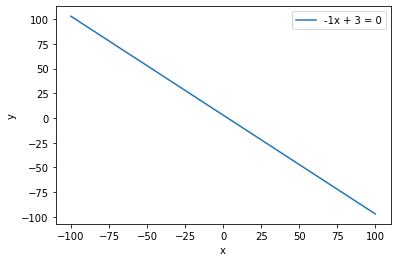

----------------------------------------------------------------------------------------------------------
Curved Line
Number of Coefficients: 3
The equation of the Curved Line is: Y = -1X2 + -2X + 5
The roots are: x1 = -3.4494897427831783 and x2 = 1.449489742783178


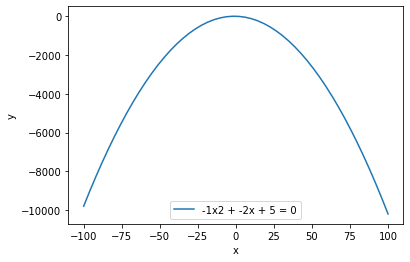

----------------------------------------------------------------------------------------------------------
Straight Line
Number of Coefficients: 2
The equation of the Straight Line is: Y = -2X + 2


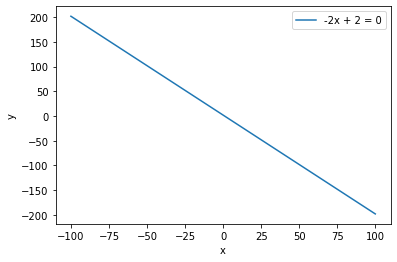

----------------------------------------------------------------------------------------------------------
Curved Line
Number of Coefficients: 3
The equation of the Curved Line is: Y = 7X2 + 6X + -5
The roots are: x1 = -1.3761785115301142 and x2 = 0.5190356543872572


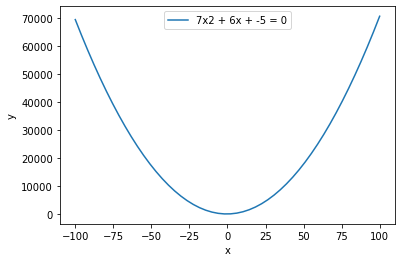

----------------------------------------------------------------------------------------------------------
Straight Line
Number of Coefficients: 2
The equation of the Straight Line is: Y = 9X + 3


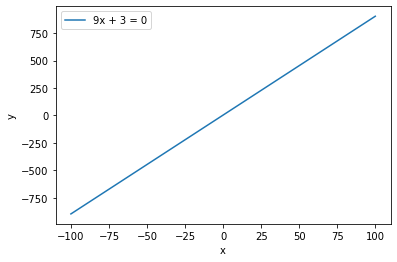

----------------------------------------------------------------------------------------------------------
Curved Line
Number of Coefficients: 3
The equation of the Curved Line is: Y = -7X2 + 6X + -7
The roots are: x1 = (0.42857142857142844+0.9035079029052511j) and x2 = (0.42857142857142844-0.9035079029052511j)


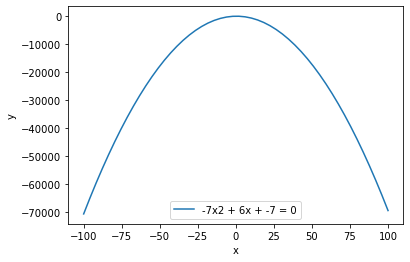

----------------------------------------------------------------------------------------------------------


In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

class iLine:
    c1=0
    c2=0
    c3=0
    
    def __init__(self,no_of_coef):
        self.no_of_coef=no_of_coef
        if self.no_of_coef==2:
            iStraight.__init__(self)
        elif self.no_of_coef==3:
            iCurved.__init__(self)
    
    def whoAmI(self):
        if self.no_of_coef==3:
            print("Curved Line")
        elif self.no_of_coef==2:
            print("Straight Line")
        print("Number of Coefficients:",self.no_of_coef)
    
    def lineEquation(self):
        if self.no_of_coef==3:
            print("The equation of the Curved Line is: Y = "+str(self.c1)+"X2 + "+str(self.c2)+"X + "+str(self.c3))
        elif self.no_of_coef==2:
            print("The equation of the Straight Line is: Y = "+str(self.c1)+"X + "+str(self.c2))
        
    def plotLine(self):
        if self.no_of_coef==3:
            iCurved.plotLine(self)
        elif self.no_of_coef==2:
            iStraight.plotLine(self)
                    
    
class iStraight(iLine):
    def __init__(self):
        self.no_of_coef = 2
        self.c1=random.randint(-10,10)
        self.c2=random.randint(-10,10)
        
    def plotLine(self):
        x=np.linspace(-100,100)
        y=self.c1*x+self.c2
        labelstring=str(self.c1)+"x + "+str(self.c2)+" = 0"
        plt.plot(x,y,label=labelstring)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='best')
        plt.show()
        
    
class iCurved(iLine):
    def __init__(self):
        self.no_of_coef = 3
        self.c1=random.randint(-10,10)
        self.c2=random.randint(-10,10)
        self.c3=random.randint(-10,10)
    
    def plotLine(self):
        x=np.linspace(-100,100)
        y=self.c1*x**2+self.c2*x+self.c3
        labelstring=str(self.c1)+"x2 + "+str(self.c2)+"x + "+str(self.c3)+" = 0"
        plt.plot(x,y,label=labelstring)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='best')
        plt.show()
    
    def findRoots(self):
        if self.c1==0 and self.c2!=0:
            self.roots = np.roots([self.c1,self.c2,self.c3])
            print("The roots are: x1 =",self.roots[0],"and x2 =",self.roots[0])
        elif self.c1==0 and self.c2==0:
            print("There are no roots for the coefficients")
        else:
            self.roots = np.roots([self.c1,self.c2,self.c3])
            print("The roots are: x1 =",self.roots[0],"and x2 =",self.roots[1])    
                
for i in range(3):
    straight = iStraight()
    straight.whoAmI()
    straight.lineEquation()
    straight.plotLine()
    print("----------------------------------------------------------------------------------------------------------")
    curved = iCurved()
    curved.whoAmI()
    curved.lineEquation()
    curved.findRoots()
    curved.plotLine()
    print("----------------------------------------------------------------------------------------------------------")

#### This is the end of assignment 2